In [35]:
import pandas as pd

filePath = "cars_raw.csv"

df = pd.read_csv(filePath)

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')

# Questions to answer
# Does ConsumerRating corellate with higher price
# Milage correlation for price with model and brand of car and year
# Does color play a role in car price
# What is the trend for EVs for new models on market
# What is the average milage a used car is sold at
df.head()

/var/folders/hh/qlc29njs1hlbzhf33lpxrnvr0000gn/T/ipykernel_31015/1348050782.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [11]:
import matplotlib.pyplot as plt

def doesFeatureCorrelateWithRating(featureName, reverse=False, size=(10, 10)):
    feature = df.get(featureName)
    consumerRatings = df.get('ConsumerRating')
    plt.figure(figsize=size)
    if reverse:
        plt.scatter(feature, consumerRatings)
    else:
        plt.scatter(consumerRatings, feature)
    plt.title(f'Consumer Rating to {featureName}')
    plt.show()

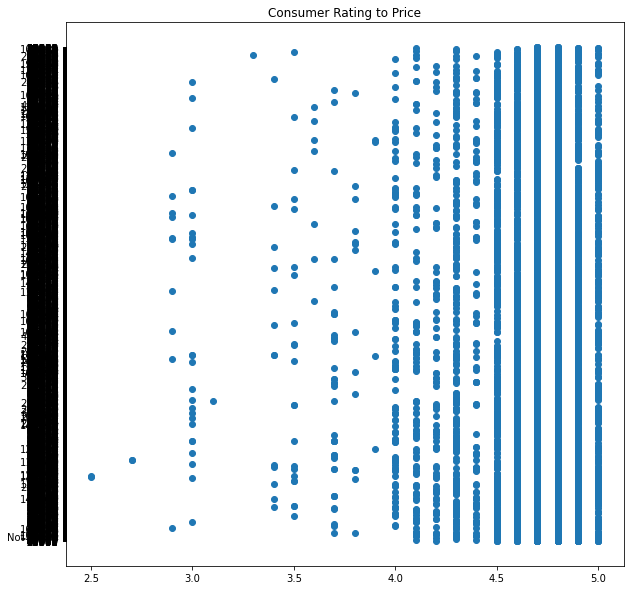

In [46]:
# Does ConsumerRating corellate with higher price
doesFeatureCorrelateWithRating('Price')
# No correlation between price and rating
# Note: most cars are rated above 4.0

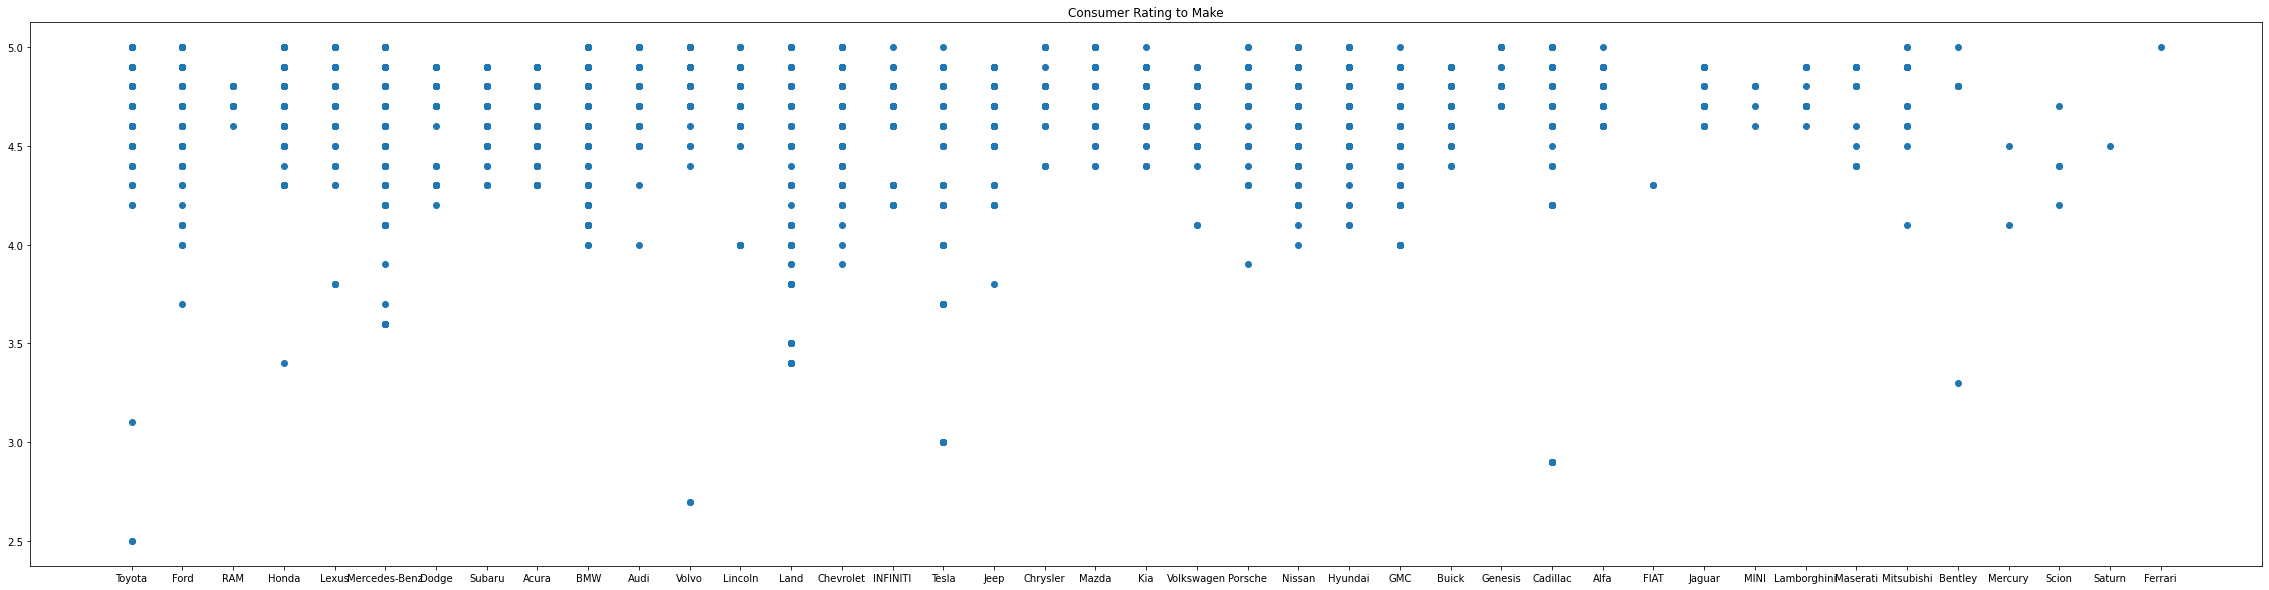

In [55]:
# Does ConsumerRating corellate with Brand
doesFeatureCorrelateWithRating('Make', reverse=True, size=(40, 10))

In [5]:
from KMeans import KMeans

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


In [6]:
numberOfClasses = len(set(df.get('Drivetrain')))

cl, c = KMeans_cosine(x, numberOfClasses)

NameError: name 'KMeans_cosine' is not defined

In [36]:
# Embed the data

embedding_keys = {}

for index, data in df.iteritems():
    if type(data[0]) == str or type(data[0]) == chr:
        embedding = {itemData: embedding for embedding, itemData in enumerate(data)}
        for i in range(len(data)):
            df.loc[i, index] = embedding[data[i]]
        
        embedding_keys[index] = embedding_keys

In [47]:
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,9343,3676,9378,9072,4.6,45,9378,7326,3.3,...,9378,9368,19,27,9378,9378,9332,0,0,29403
1,2018,9372,9335,9378,6673,4.8,817,9378,5264,4.8,...,9378,9360,19,24,9378,9354,8876,1,1,32929
2,2017,9296,9296,9378,2541,4.7,495,9378,7135,4.6,...,9378,9360,15,21,9378,9378,9296,2541,2541,23173
3,2021,9373,2428,9378,8431,5.0,36,9378,3,4.6,...,9373,9368,29,35,9378,9377,9373,3,3,10598
4,2020,9356,8568,9378,8997,4.8,76,9378,5447,4.8,...,7537,9368,20,27,9378,9378,9332,4,4,28137
